In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data= pd.read_excel(r"HousePricePrediction.xlsx")
df=pd.DataFrame(data)
print(
    df.head(5)
)

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [37]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


<Axes: >

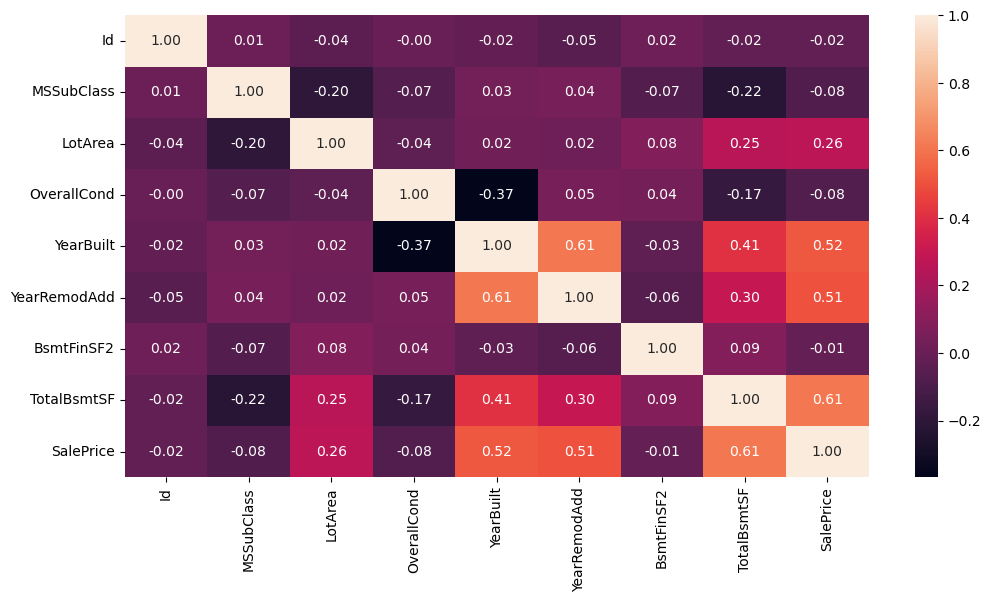

In [39]:
#sadece numerical olanları seçeceğiz
#kayıtlı veri değişimi analizine bakacağız 
numerical_data=df.select_dtypes(include=["int","float"])

#Görselleştirmenin boyutunu ayarlamak için genişlik=12 yükseklik=6
plt.figure(figsize=(12, 6))

#ısı haritası çizme --> seaborn kütüphanesinin heatmap fonksiyonu kullanılıyor
#numerical_data.corr():  numerical_data üzerindeki tüm sayısal sütunlar arasındaki korelasyon değerlerini hesaplar
# fmt = '.2f --> her hücredeki değerin ondalık hane sayısnı hesaplamak için 
# annot = True --> Hücrelerin üzerine korelasyon değerlerini ekler, böylece değerler direkt olarak grafikte görülebilir.
sns.heatmap(numerical_data.corr(), 
            fmt = '.2f', 
            annot = True
           )

Değer 1'e yakınsa pozitif güçlü bir ilişki, -1'e yakınsa negatif güçlü bir ilişki, 0'a yakınsa ilişkisizliği gösterir.
TotalBsmtSF (Toplam bodrum alanı) ile SalePrice arasında 0.61 gibi güçlü bir pozitif korelasyon var. Bu da bodrum alanının genişliğinin satış fiyatını artırabileceğini gösterir.
Örneğin, YearBuilt ve SalePrice arasında pozitif bir ilişki görülüyor (0.52). Bu, yeni yapılmış binaların satış fiyatlarıyla daha güçlü bir ilişki olduğunu gösterir.

OverallCond ile YearBuilt arasındaki -0.37 değeri, yapının yeni olması durumunda genel kondisyonunun daha iyi olması gerektiğini gösterir.

<Axes: title={'center': 'CATEGORICAL FEATURES'}>

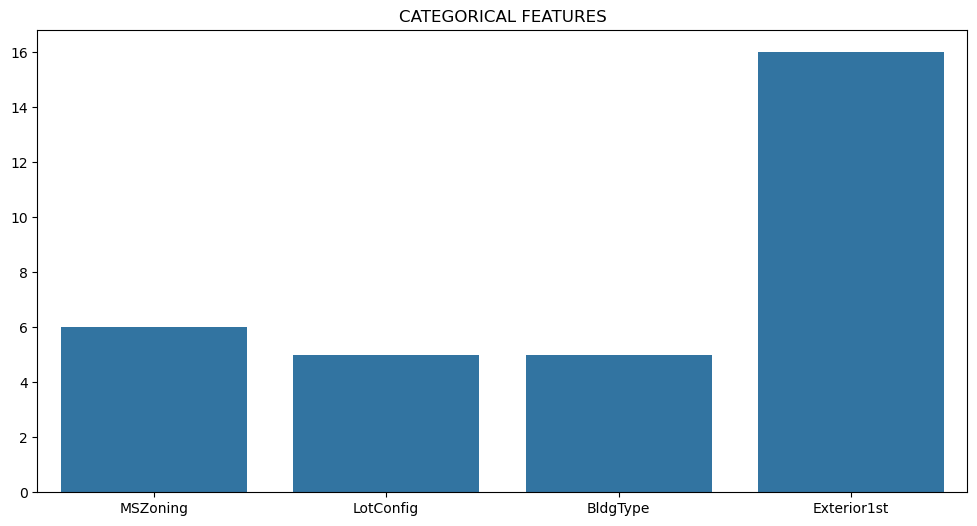

In [40]:
# daha detaylı bakmak için bar plotu çizelim 
#plt.bar(x, yükseklik, genişlik, alt, hizalama)

str = (df.dtypes == 'object')
object_cols = list(obj[str].index) #--> verideki kategorik sütunlar

plt.figure(figsize=(12,6))
plt.title("CATEGORICAL FEATURES")

#boş bir liste oluşturalım
uniqueValues = []
for col in object_cols:   #kategorik sütunlar üzerinde gezme
    #sütundaki benzersiz değerlerin sayısını hesaplarım ve listeye eklerim
    uniqueValues.append(df[col].unique().size)


# seaborn kütüphanesi kullanarka bir barplot çizeriz
sns.barplot(x=object_cols,y=uniqueValues)

    
    
    

Exterior1st diğer özelliklerden çok daha fazla benzersiz kategoriye sahip. Bu durum, dış cephe çeşitliliğinin geniş olduğunu gösterir.
Exterior1st gibi özelliklerde, kategorileri birleştirerek basitleştirmek düşünülebilir. Bu, modelin karmaşıklığını azaltmak ve performansı iyileştirmek açısından faydalı olabilir.


 Her kategorinin gerçek sayısının bulunması için her dört özelliğin çubuk grafiğini ayrı ayrı çizebiliriz.

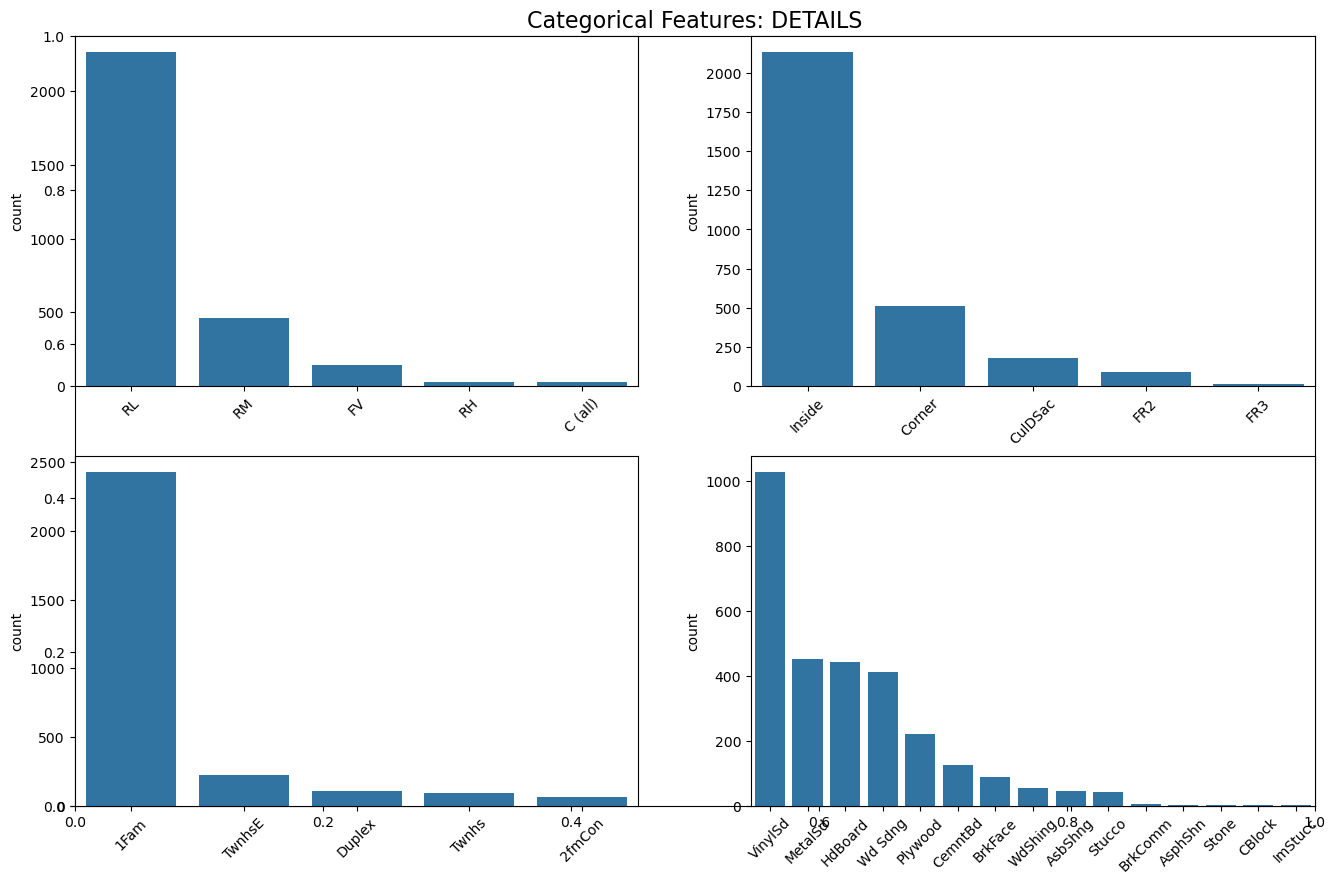

In [41]:
plt.figure(figsize=(16, 10))
plt.title('Categorical Features: DETAILS',fontsize=16)
index=1

for col in object_cols:
    #sütundaki her kategorinin kaç kez tekrarlandığı hesaplanıyor
    y = df[col].value_counts()
    #1 satırlı ve 4 sütunlu bir düzenin her döngüdeki sırasına (1, 2, 3, 4) göre grafik ekliyor.
    plt.subplot(2, 2, index)     #alt grafik oluşturma
    sns.barplot(x=list(y.index), y=y)
    plt.xticks(rotation=45)
    index += 1



In [42]:
# VERİ TEMİZLEME
# amacım boş ve eksik verileri doldurmak ve gereksiz olan sütunları silmek
#ilk olarak verimize bir daha bakalım 
print(df)

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0      

In [43]:
# id column'u tahminde bana bir fayda sağlamayacağı için onu direkt silebilirim
# axis=1 diyerek bir sütunu sileceğimi belirtiyorum
df =df.drop(["Id"], axis=1)


In [44]:
#veriye tekrar bakalım
print(df)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [45]:
print(df.isnull().sum())

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [46]:
#veri de de gördüğüm gibi salesPrice'da çok fazla null değer var
#salesPrice benim için önemli çünkü güçlü bir korelasyon yakalamıştım.
# bu yüzden ortalama değerlerle doldurabilrim 

df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean()) 

# diğer boş değerlere ait kayıtları silebilirim çünkü sayısı zaten çok az
df = df.dropna()


In [47]:
print(df)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [48]:
#şimdi tekrar bir null değerim kalmış mı kontrol etmek istiyorum
print(df.isnull().sum())

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


Veri ön işleme adımında kategorik nitelikli verileri sayısal forma dönüştürebiliriz. Kategorik verilerin sayısal forma dönüştürülmesi için birçok yöntem vardır. --> Ordinal Encoder , Label Encoder ve OneHotEncoder (en çok kullanılan yöntemlerdendir)

**Ordinal Encoder:** Veri setimizde bulunan sıralama niteliğine sahip veriler üzerinde kullanılır. Örneğin bir insan olarak Junior<Senior<Manager<Director<Ceo sıralamasını görebiliriz lakin bunu makinelerin, algoritmaların anladığı dile çevirmek gerekir. 
Pandas kütüphanesinde bulunan Categorical() metodu kullanalır.
**pd.Categorical(values,categories,ordered)**

values: Kategorik veri değerlerini içermelidir.

categories: Katergorik nitelikteki verilerin unique değerlerini içermeli ve ilişki sıralaması burada belirlenir.

ordered: True/False değerleri alabilen bu parametre,herhangi bir değer atanmadığında default’u False olarak davranır. Eğer değerler sıralanmalı ise True değeri atanmalıd
Bir sonraki adımda ise yine Pandas kütüphanesinde bulunan factorize() metoduyla sıralanmış değerleri sayısal değerlere çeviririz.ır.


**Label Encoder:** Kategorik değerleri sayısal forma dönüştürmek için LabelEncoder classını ve bu class’taki fit_transform() metodunu kullanırız.

Label Encoder , binary(ikili) kategorik değerler için kullanılımı tercih edilir. İkiden fazla değerlerimiz olsaydı örneğin ülkeleri 0: TR, 1:FR, 2:USA gibi düşünelim modeli eğitirken USA ,FR ve TR’den daha yüksek önceliğe sahip gibi yorumlanabilir fakat ülkeler arasında böyle bir öncelik ilişkisi yoktur. Bu yüzden ikiden fazla gözlem değeri bulunan değişkenlerin One Hot Encoder yöntemiyle çözülmesi önerilir.

**One Hot Encoder:**  **sklearn.preprocessing** kütüphanesinden gelir kategorik verilerin temsilinin daha etkileyici ve kolay olmasını sağlar. Diğer yöntemlerden farklı olarak değişkende bulunan gözlem değerlerinin sayısı kadar 1 ve 0'lardan oluşan yeni çoklu değişkenler üretir.

In [49]:
# Kategorik veriye sahip olan sütunları bir listeliyoruz 
print("Categorical variables:")
print(object_cols)
print('Number of categorical features:', len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical features: 4


In [53]:
from sklearn.preprocessing import OneHotEncoder

# sparse_output --> kodlanan çıktının veri türünü belirler.
# sparse_output=True --> çıktı verimliliği için matris olarak döndürülür.
# sparse_output=False --> ise çıktı normal bir DataFrame veya array olarak döner.

# handle_unknown='ignore' --> Eğitim setinde olmayan ancak test setinde ortaya çıkan kategorilerle nasıl başa çıkılacağını belirler.
# ignore: Bilinmeyen kategoriler görmezden gelinir ve işlem sırasında hata oluşmasını engeller.
# error: Bilinmeyen bir kategoriyle karşılaşıldığında hata verir (varsayılan değerdir).


OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# yeni bir DataFrame olarak saklıyoruz
# fit_transform --> (kategorik sütunlar) üzerinde bir dönüşüm gerçekleştirir.
# index=df.index --> yeni DataFrame’deki satırların orijinal df verisiyle aynı indekslere sahip olmasını sağlar
# columns=OH_encoder.get_feature_names_out() --> OneHotEncoder ile oluşturulan yeni sütunların adlarını alır. 
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]), 
                       index=df.index, 
                       columns=OH_encoder.get_feature_names_out())

# orijinal DataFrame’i, one-hot kodlanmış DataFrame ile birleştirir
df_final = pd.concat([df.drop(object_cols, axis=1), OH_cols], axis=1)

In [54]:
print(df_final)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
2914         160     1936            7       1970          1970         0.0   
2915         160     1894            5       1970          1970         0.0   
2916          20    20000            7       1960          1996         0.0   
2917          85    10441            5       1992          1992         0.0   
2918          60     9627            5       1993          1994         0.0   

      TotalBsmtSF     SalePrice  MSZoning_C (all)  

**Veri Setini Test ve Eğitim Verisi Olarak Ayırma**

Yeni verilere iyi genelleme yapabilen bir model oluşturmak için, modeli eğitmek için kullanılan aynı veriler üzerinde değerlendirme yapmaktan kaçınmak amacıyla verileri eğitim ve test kümelerine ayırmak önemlidir.

In [55]:
# mean_absolute_error --> bir regresyon modelinin tahminlerinin doğruluğunu değerlendirmek için kullanılır.
# düşük bir MAE değeri, daha doğru tahminler anlamına gelir.
from sklearn.metrics import mean_absolute_error

# train_test_split --> bir veri setini eğitim ve test setlerine böler
# model yalnızca eğitim verileri üzerinde çalıştırıldığında, model performansı hakkında doğru bilgi edilemeyebilir.
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)        # x= satış fiyatı hariç kalan tüm sütunlar
Y = df_final['SalePrice']      # y=satış fiyatı sütunu

# %80, eğitim seti %20'si test seti olacak.
# random_state=0: Rastgelelik kontrolü sağlar. Bu sayede aynı kodu her çalıştırdığımızda aynı eğitim ve doğrulama kümelerine sahip oluruz.
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.7, test_size=0.3, random_state=0)


**Bu üç model, sürekli değerleri tahmin etmek için kullanılan yaygın makine öğrenimi regresyon modelleridir.**

**SVM (Support Vector Machine):** Yalnızca sınıflandırmada değil, regresyon problemlerinde de kullanılabilir. 

**Random Forest Regressor:** Birçok karar ağacını birleştirerek çalışan bir topluluk yöntemidir. Bu ağaçlar bağımsız olarak eğitilir, sonuç olarak her ağacın tahmini birleştirilerek son tahmin elde edilir.
karar ağaçlarını birleştirerek ortalama alır ve sürekli değerleri tahmin eder.

**Linear Regressor:**  Bağımlı ve bağımsız değişkenler arasında doğrusal bir ilişki kurmaya çalışır. Veriye en uygun çizgiyi belirlemek için en küçük kareler yöntemi (least squares) kullanır.


In [58]:
#SVM 

from sklearn import svm
from sklearn.svm import SVC

#tahmin edilen değerlerle gerçek değerler arasındaki yüzdelik hata oranını hesaplar. 
from sklearn.metrics import mean_absolute_percentage_error

# Destek Vektör Regresyon (SVR) modelini oluşturur.
# Bu model, veri setindeki sürekli değişkenleri tahmin etmek için uygundur.
model_SVR = svm.SVR()

#fit fonksiyonu, modeli X_train ve Y_train verileri kullanarak eğitir
model_SVR.fit(X_train,Y_train)

#predict() --> X_valid test veri setini kullanarak Y_pred adında tahmin edilen değerleri üretir.
Y_pred = model_SVR.predict(X_valid)


# Y_valid: test veri setinin gerçek değerleri.
# Y_pred: test veri seti üzerinde model tarafından yapılan tahminler.
print(mean_absolute_percentage_error(Y_valid, Y_pred))



0.18140037212955581


**Yüksek bir yüzdelik hata, tahminlerin gerçek değerlerden büyük ölçüde saptığını, düşük bir yüzdelik hata ise modelin başarılı olduğunu gösterir.**

In [66]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# n_estimators--> RandomForestRegressor modelinde kaç tane karar ağacı kullanılacağını belirler
# Daha fazla ağaç kullanmak genelde modelin daha iyi tahmin yapmasına yardımcı olur

model_RFR = RandomForestRegressor(n_estimators=5)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19396423630913812

In [64]:
#Linear Regressor

from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1862314336859395


**Açıkça, SVM modeli daha iyi doğruluk sağlıyor çünkü ortalama mutlak hata diğer tüm regresör modelleri arasında en az yani yaklaşık 0,18.**